# Exploratory Data Analysis

## Printed Vs Handwritten Words Dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
from random import shuffle
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
train_data = r'D:/Office/MS/finding_sign_on_form/keras_model/train_data/'

In [3]:
def one_hot_label(img):
    label = img.split('_')[0]
    if label == 'h':
#         ohl = np.array([1,0])
        ohl = 1
    elif label == 'l' or label == 'p':
#         ohl = np.array([0,1])
        ohl = 0
    return ohl


def train_data_with_label():
    train_images = []
    train_data_imgs = [file for file in os.listdir(train_data) if file.endswith(".jpg") or file.endswith(".JPG")]
    for i in train_data_imgs:
        path = os.path.join(train_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (100, 32))
        img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)[1]
        train_images.append([np.array(img).flatten(), one_hot_label(i)])
    shuffle(train_images)
    return train_images

In [4]:
training_images = train_data_with_label()
X = np.array([i[0] for i in training_images])#.reshape(-1,100,32)
Y = np.array([i[1] for i in training_images])
print(X.shape)
print(Y.shape)

(4010, 3200)
(4010,)


In [5]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = Y
df['label'] = df['label'].apply(lambda i:'handwritten' if i==1 else 'printed')
df['label'].value_counts()

handwritten    2005
printed        2005
Name: label, dtype: int64

In [6]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3191,pixel3192,pixel3193,pixel3194,pixel3195,pixel3196,pixel3197,pixel3198,pixel3199,label
0,255,255,255,255,255,0,255,255,255,255,...,255,255,255,255,255,255,255,255,255,handwritten
1,255,255,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,printed
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,255,255,255,255,255,255,printed
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,printed
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,printed


### Dataset is balanced with 2005 points of each class

In [94]:
data['label'].value_counts()

printed        2005
handwritten    2005
Name: label, dtype: int64

### Below is the visualization of Class frequencies

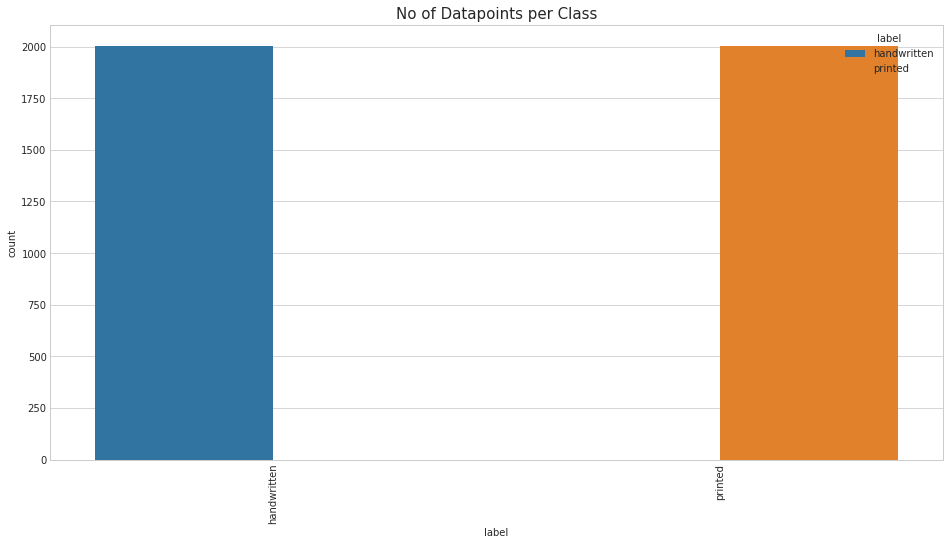

In [8]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
sns.countplot(x='label',hue='label', data = df)
plt.title('No of Datapoints per Class', fontsize=15)
# sns.countplot(data.label)
plt.xticks(rotation=90)
plt.show()

## t-SNE visulaization to observe the non-linear variation in the data

In [21]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0],'y':X_reduced[:,1],'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x',y = 'y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 4010 samples in 0.531s...
[t-SNE] Computed neighbors for 4010 samples in 81.508s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4010
[t-SNE] Computed conditional probabilities for sample 2000 / 4010
[t-SNE] Computed conditional probabilities for sample 3000 / 4010
[t-SNE] Computed conditional probabilities for sample 4000 / 4010
[t-SNE] Computed conditional probabilities for sample 4010 / 4010
[t-SNE] Mean sigma: 36.523502
[t-SNE] Computed conditional probabilities in 0.031s
[t-SNE] Iteration 50: error = 115.6513519, gradient norm = 0.1052737 (50 iterations in 2.218s)
[t-SNE] Iteration 100: error = 106.9463425, gradient norm = 0.1277021 (50 iterations in 2.062s)
[t-SNE] Iteration 150: error = 103.4387131, gradient norm = 0.1537876 (50 iterations in 2.000s)
[t-SNE] Iteration 200: error = 101.3360519, gradient norm = 0.1410435 (50 iterations in 2.09

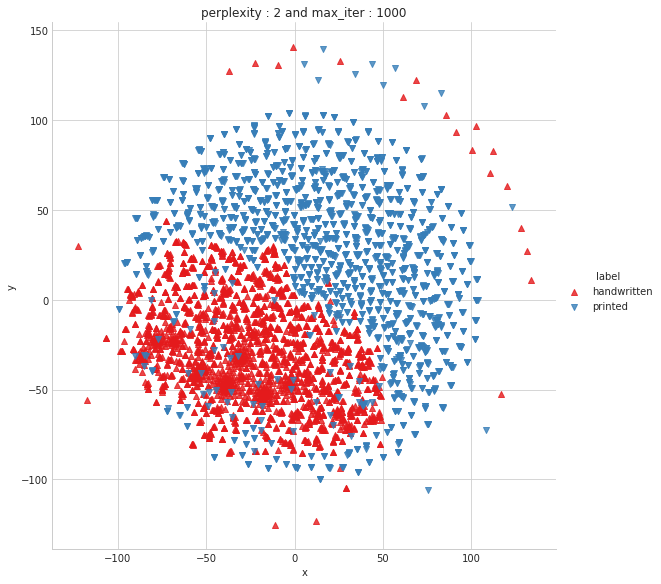

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 4010 samples in 0.531s...
[t-SNE] Computed neighbors for 4010 samples in 81.067s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4010
[t-SNE] Computed conditional probabilities for sample 2000 / 4010
[t-SNE] Computed conditional probabilities for sample 3000 / 4010
[t-SNE] Computed conditional probabilities for sample 4000 / 4010
[t-SNE] Computed conditional probabilities for sample 4010 / 4010
[t-SNE] Mean sigma: 1090.087324
[t-SNE] Computed conditional probabilities in 0.078s
[t-SNE] Iteration 50: error = 111.7077789, gradient norm = 0.0942091 (50 iterations in 1.734s)
[t-SNE] Iteration 100: error = 104.7452469, gradient norm = 0.1245546 (50 iterations in 1.406s)
[t-SNE] Iteration 150: error = 105.7828369, gradient norm = 0.0938064 (50 iterations in 1.468s)
[t-SNE] Iteration 200: error = 104.0683289, gradient norm = 0.1074498 (50 iterations

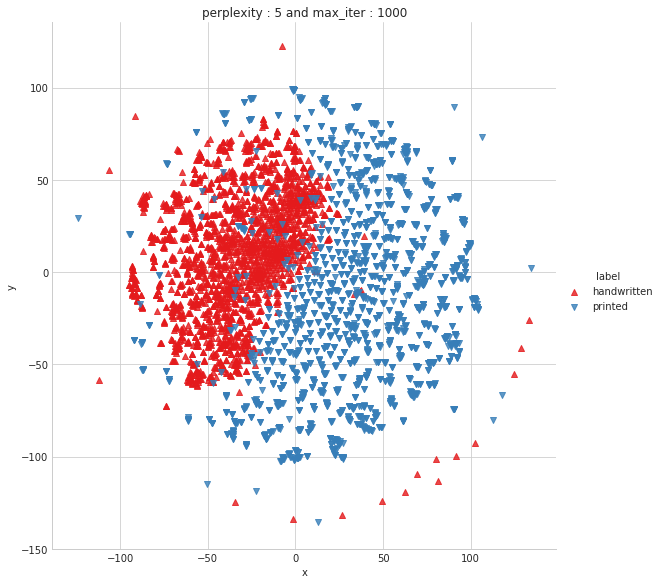

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4010 samples in 0.531s...
[t-SNE] Computed neighbors for 4010 samples in 82.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4010
[t-SNE] Computed conditional probabilities for sample 2000 / 4010
[t-SNE] Computed conditional probabilities for sample 3000 / 4010
[t-SNE] Computed conditional probabilities for sample 4000 / 4010
[t-SNE] Computed conditional probabilities for sample 4010 / 4010
[t-SNE] Mean sigma: 1271.115308
[t-SNE] Computed conditional probabilities in 0.156s
[t-SNE] Iteration 50: error = 104.9399719, gradient norm = 0.1104588 (50 iterations in 1.921s)
[t-SNE] Iteration 100: error = 105.0098877, gradient norm = 0.0704756 (50 iterations in 1.781s)
[t-SNE] Iteration 150: error = 103.9987488, gradient norm = 0.1008314 (50 iterations in 1.671s)
[t-SNE] Iteration 200: error = 105.4591904, gradient norm = 0.1245467 (50 iteration

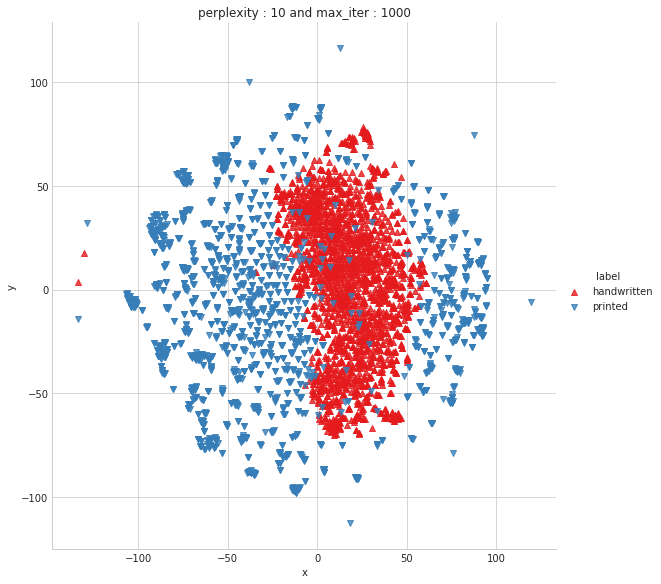

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 4010 samples in 0.531s...
[t-SNE] Computed neighbors for 4010 samples in 82.823s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4010
[t-SNE] Computed conditional probabilities for sample 2000 / 4010
[t-SNE] Computed conditional probabilities for sample 3000 / 4010
[t-SNE] Computed conditional probabilities for sample 4000 / 4010
[t-SNE] Computed conditional probabilities for sample 4010 / 4010
[t-SNE] Mean sigma: 1401.797418
[t-SNE] Computed conditional probabilities in 0.281s
[t-SNE] Iteration 50: error = 96.8474579, gradient norm = 0.2037833 (50 iterations in 2.140s)
[t-SNE] Iteration 100: error = 99.1170883, gradient norm = 0.0779103 (50 iterations in 1.562s)
[t-SNE] Iteration 150: error = 99.3457565, gradient norm = 0.1057692 (50 iterations in 1.765s)
[t-SNE] Iteration 200: error = 100.4704437, gradient norm = 0.0599483 (50 iterations i

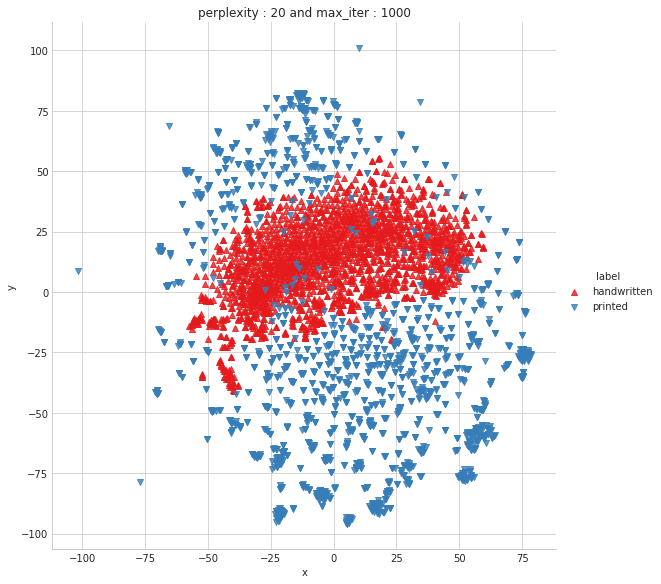

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4010 samples in 0.547s...
[t-SNE] Computed neighbors for 4010 samples in 82.233s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4010
[t-SNE] Computed conditional probabilities for sample 2000 / 4010
[t-SNE] Computed conditional probabilities for sample 3000 / 4010
[t-SNE] Computed conditional probabilities for sample 4000 / 4010
[t-SNE] Computed conditional probabilities for sample 4010 / 4010
[t-SNE] Mean sigma: 1535.298017
[t-SNE] Computed conditional probabilities in 0.656s
[t-SNE] Iteration 50: error = 86.3067551, gradient norm = 0.0884051 (50 iterations in 2.609s)
[t-SNE] Iteration 100: error = 86.7797623, gradient norm = 0.0826620 (50 iterations in 2.312s)
[t-SNE] Iteration 150: error = 86.8510208, gradient norm = 0.0572308 (50 iterations in 2.234s)
[t-SNE] Iteration 200: error = 87.1914749, gradient norm = 0.0808892 (50 iterations i

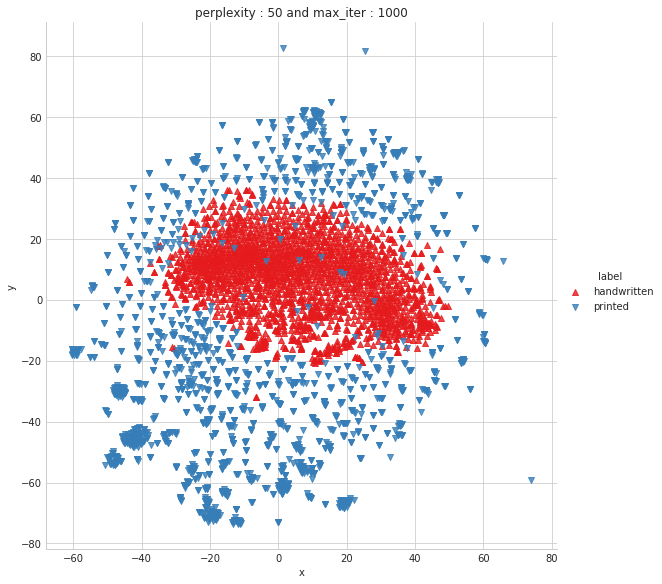

Done


In [23]:
X_pre_tsne = df[feat_cols].values
y_pre_tsne = df['label']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

## Conclusions:

- From the t-SNE graphs we can see that, so of the some of the data points are overlapping each other.
- Although some data points are overlapping, rest of the data is well seperated.
- With the help of non linear functions, we can build a good classifier.